In [1]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
db = pd.read_csv("Bank_Customer_Churn_dataset.csv")

In [3]:
db.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
db.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
db.shape

(10000, 14)

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
db.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
db.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In this dataset, the attributes <b>CustomerId</b> and <b>Surname</b> are not important for our model since they are specific to customers and does not hold any important significance for our prediction.

In [9]:
db = db.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [10]:
db.shape

(10000, 11)

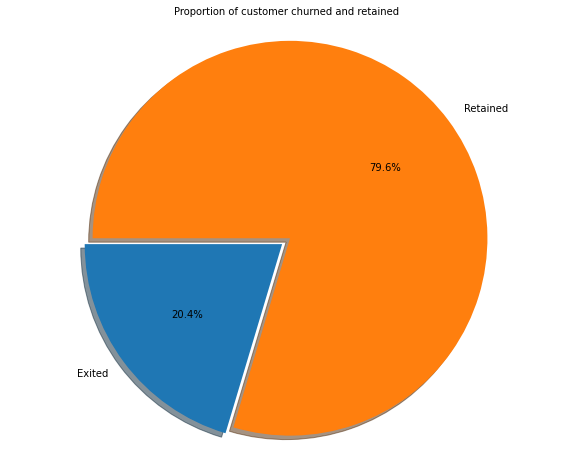

In [11]:
labels = 'Exited', 'Retained'
sizes = [db.Exited[db['Exited']==1].count(), db.Exited[db['Exited']==0].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

About 20% of the customers exited. 

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

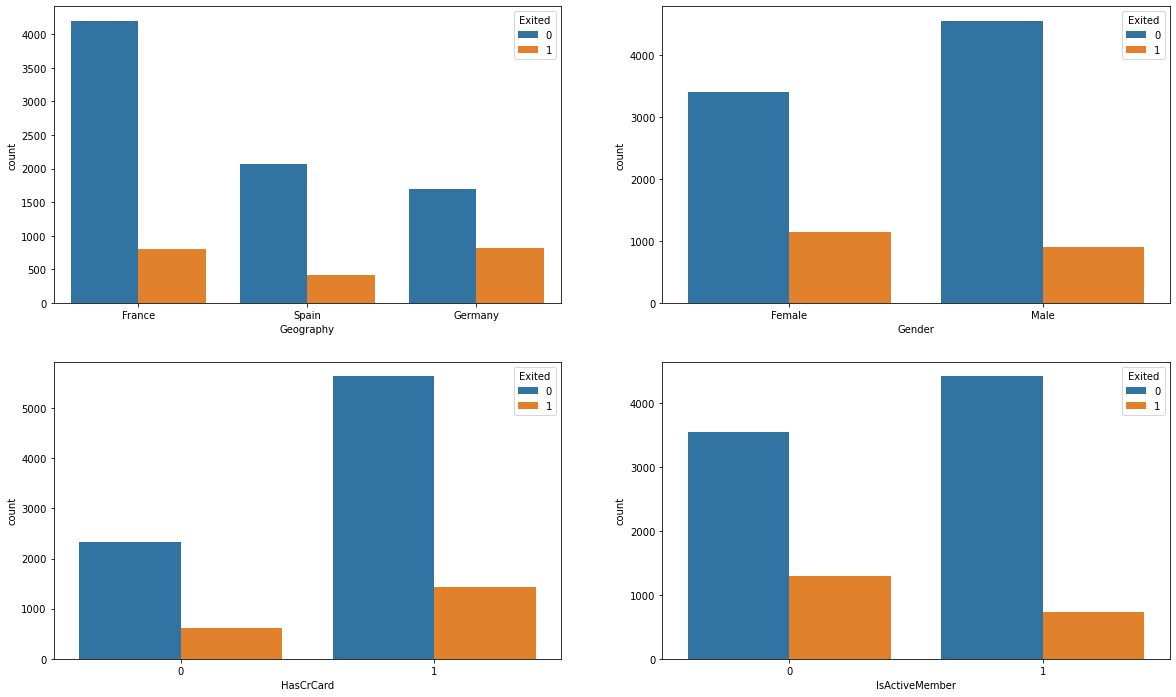

In [12]:
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = db, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = db, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = db, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = db, ax=axarr[1][1])

<AxesSubplot:>

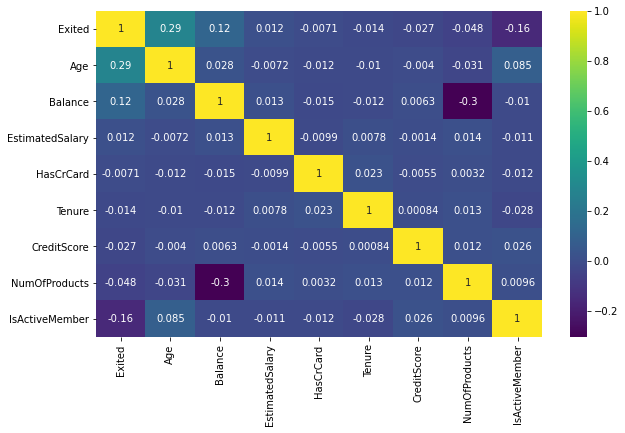

In [13]:
k = 10 #number of variables for heatmap
cols = db.corr().nlargest(k, 'Exited')['Exited'].index
cm = db[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [14]:
categorical_variables = [col for col in db.columns if col in "O"
                        or db[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [15]:
numeric_variables = [col for col in db.columns if db[col].dtype != "object"
                        and db[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [16]:
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [17]:
def has_outliers(dataframe, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()

In [18]:
for var in numeric_variables:
    print("Outliers in", var, ":" , has_outliers(db, [var]))

Outliers in CreditScore : None
Outliers in Age : None
Outliers in Balance : None
Outliers in EstimatedSalary : None


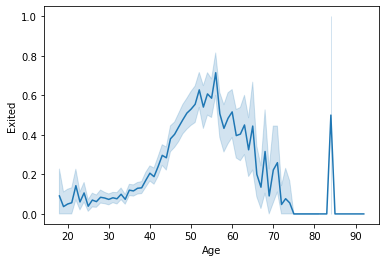

In [19]:
sns.lineplot(x = "Age", y = "Exited", data = db);

In [20]:
db["NumOfProducts"] = db["NumOfProducts"].astype("category")
db["HasCrCard"] = db["HasCrCard"].astype("category")
db["IsActiveMember"] = db["IsActiveMember"].astype("category")

db = pd.get_dummies(db, columns = ["Geography"])
db = pd.get_dummies(db, columns = ["Gender"])
db = pd.get_dummies(db, columns = ["NumOfProducts"])
db = pd.get_dummies(db, columns = ["HasCrCard"])
db = pd.get_dummies(db, columns = ["IsActiveMember"])

In [21]:
db.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,0,1,1,0,1,0,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,0,1,1,0
3,699,39,1,0.00,93826.63,0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,0,1,0,1


In [22]:
db.drop(["Tenure"], axis = 1 , inplace = True)

In [23]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [24]:
new_cols_ohe = ["Gender_Male","Gender_Female","Geography_Germany","Geography_Spain","Geography_France"]
like_num = [col for col in db.columns if db[col].dtypes != 'O' and len(db[col].value_counts()) <= 10]
cols_need_scale = [col for col in db.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    db[col] = robust_scaler(db[col])

In [25]:
X = db.drop("Exited",axis=1)
Y = db["Exited"]

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

<b>Logistic Regression</b>

In [28]:
log = LogisticRegression(solver = "liblinear")
log.fit(x_train,y_train)
log

LogisticRegression(solver='liblinear')

In [29]:
log.intercept_

array([-0.01056124])

In [30]:
log.coef_

array([[-0.09678319,  0.8343355 , -0.09863121,  0.01250319, -0.35656841,
         0.59722868, -0.25122152,  0.25719444, -0.26775569, -1.1990464 ,
        -2.73122179,  1.49256524,  2.42714171,  0.01187738, -0.02243863,
         0.53892666, -0.54948791]])

In [31]:
print("Test accurarcy {}".format(log.score(x_test,y_test)))

Test accurarcy 0.8425


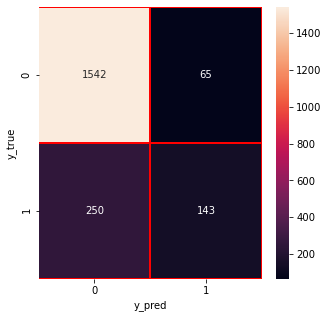

In [32]:
y_pred = log.predict(x_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [33]:
cross_val_score(log, x_test, y_test, cv = 10).mean()

0.8404999999999999

<b>KNN</b>

In [34]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_model

KNeighborsClassifier()

In [35]:
y_pred = knn_model.predict(x_test)

In [36]:
accuracy_score(y_test,y_pred)

0.837

In [37]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [38]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [39]:
print("The best parameters: " + str(knn_cv.best_params_))

The best parameters: {'n_neighbors': 9}


In [40]:
knn = KNeighborsClassifier(9)
knn_model = knn.fit(x_train, y_train)

In [41]:
y_pred = knn_model.predict(x_test)

In [42]:
accuracy_score(y_test, y_pred)

0.8455

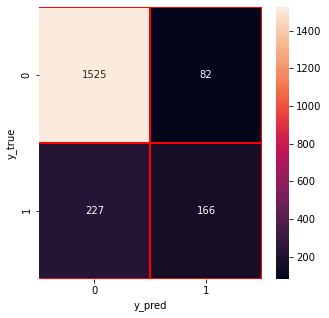

In [43]:
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<b>Random Forest</b>

In [44]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

In [45]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8615

In [46]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [47]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [48]:
rf_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [49]:
print("The best parameters: " + str(rf_cv_model.best_params_))

The best parameters: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 500}


In [50]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=10,
                       n_estimators=1000)

In [51]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8645

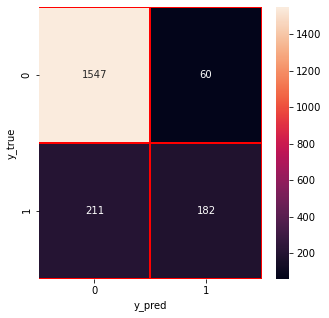

In [52]:
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [53]:
models = [
    knn_model,
    log,
    rf_tuned,
     
        ]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 84.5500%
----------------------------
LogisticRegression:
Accuracy: 84.2500%
----------------------------
RandomForestClassifier:
Accuracy: 86.4500%
